In [23]:
import numpy as np
import pandas as pd
from IPython.display import display
import sklearn
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[10,5])
from sklearn import preprocessing

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from collections import defaultdict, Counter
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, homogeneity_score, silhouette_score, roc_auc_score, classification_report, confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import sys
import timeit
np.set_printoptions(threshold=sys.maxsize)

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from util import evaluate_data, graph_LC, graph_C, normalize_data, create_stratified_data, prepare_data, preprocess_ufc_data

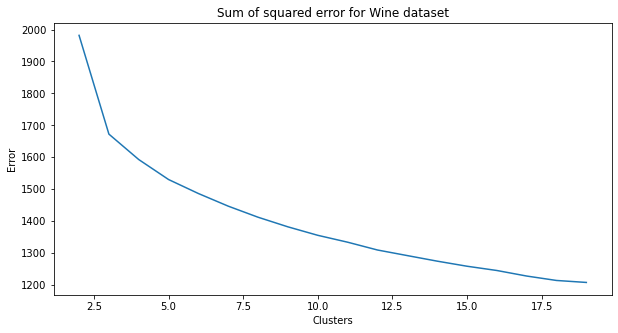

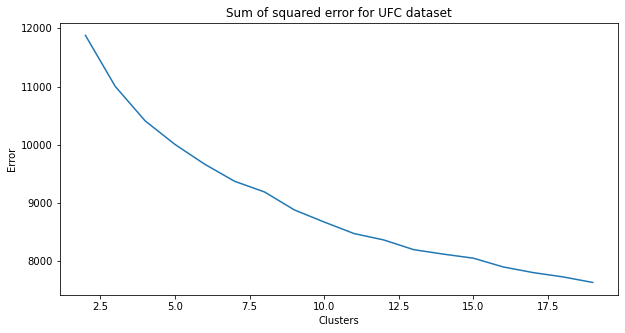

Accurary Score: 0.3756
Mutual Info Score: 0.6508039405383362
Accurary Score: 0.4290089086859688
Mutual Info Score: 0.0006817581965528329


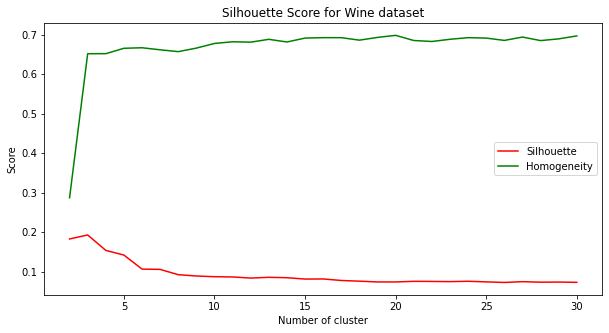

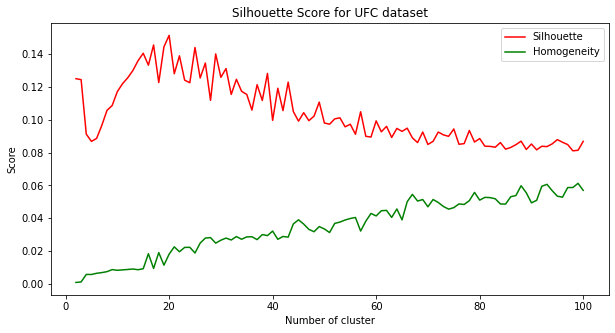

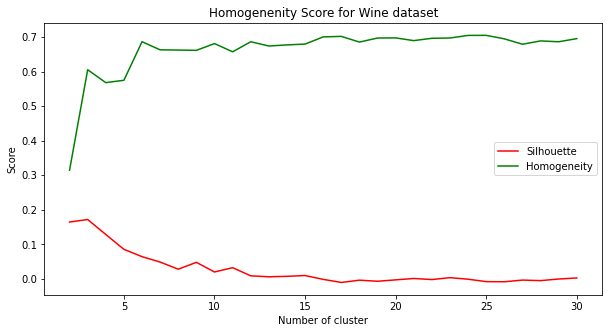

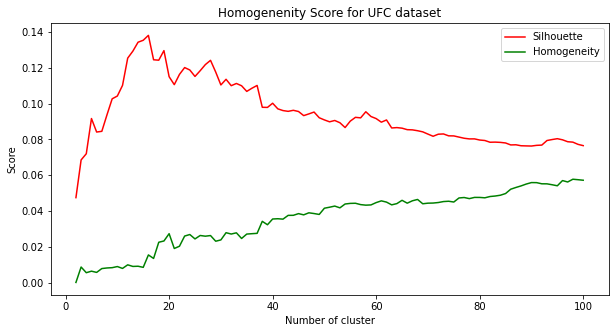

EM accuracy score: 0.0658
EM accuracy score: 0.40506681514476617
0.586
              precision    recall  f1-score   support

           1       0.65      0.41      0.50      1577
           2       0.59      0.66      0.62      2013
           3       0.55      0.68      0.61      1410

    accuracy                           0.59      5000
   macro avg       0.59      0.58      0.58      5000
weighted avg       0.60      0.59      0.58      5000

[0.63763675 0.56803959 0.66925302 0.58015554 0.58357614 0.43912092
 0.56086904 0.59475095 0.6050848  0.60279401] 0.5841280749250104


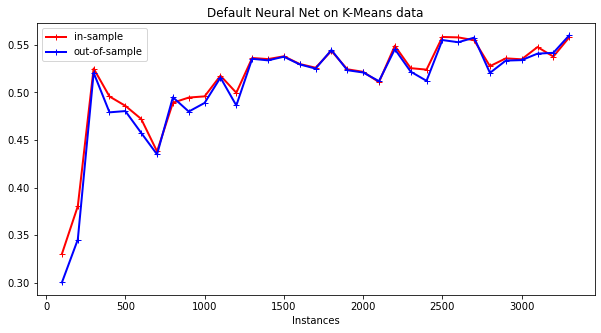

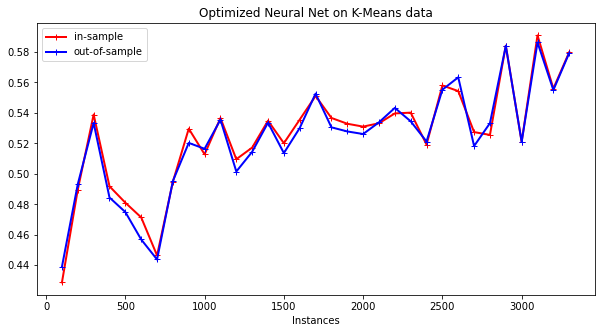

K-Means


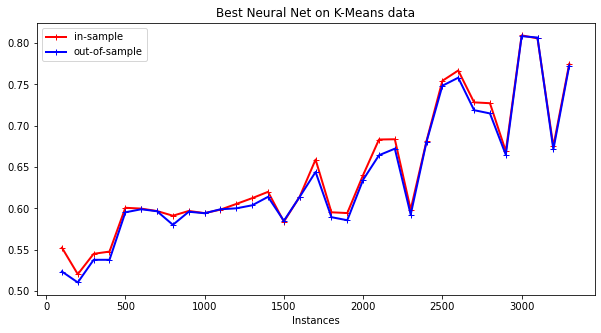

K-Means Time:  200.20685106801102
              precision    recall  f1-score   support

           1    0.88654   0.88484   0.88569       521
           2    0.85653   0.89910   0.87730       664
           3    0.93764   0.87312   0.90423       465

    accuracy                        0.88727      1650
   macro avg    0.89357   0.88568   0.88907      1650
weighted avg    0.88886   0.88727   0.88754      1650

[[461  52   8]
 [ 48 597  19]
 [ 11  48 406]]
0.6536
              precision    recall  f1-score   support

           1       0.52      0.51      0.52      1577
           2       0.69      0.76      0.72      2013
           3       0.75      0.65      0.70      1410

    accuracy                           0.65      5000
   macro avg       0.65      0.64      0.65      5000
weighted avg       0.65      0.65      0.65      5000



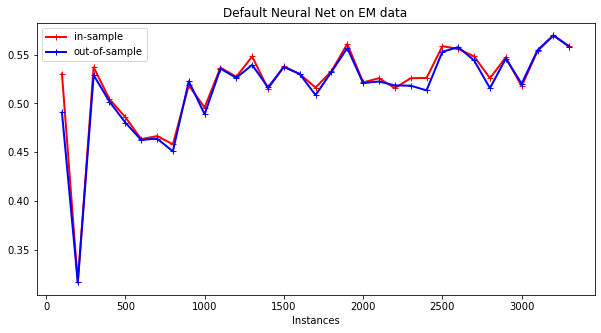

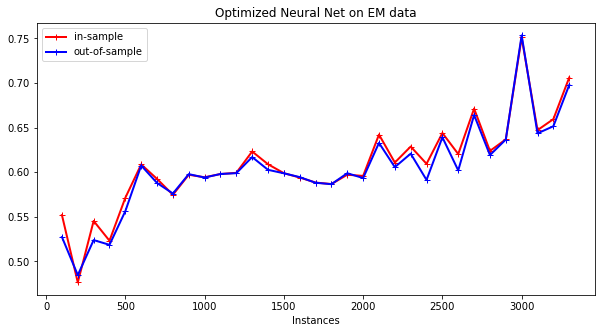

EM


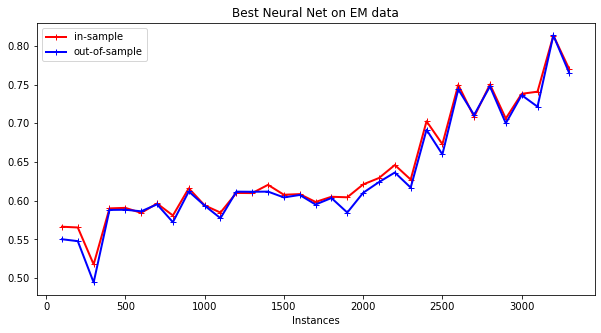

EM Time:  200.41083369002445
              precision    recall  f1-score   support

           1    0.89509   0.76967   0.82766       521
           2    0.84255   0.89458   0.86779       664
           3    0.77062   0.82366   0.79626       465

    accuracy                        0.83515      1650
   macro avg    0.83609   0.82930   0.83057      1650
weighted avg    0.83887   0.83515   0.83496      1650

[[401  36  84]
 [ 40 594  30]
 [  7  75 383]]


In [24]:
def separate_data_label(dataset, target):
    X = dataset.drop(target, 1).copy().values
    Y = dataset[target].copy().values
    
    return X, Y
    
def normalize(X):
    normalize_factor = preprocessing.MinMaxScaler()
    return normalize_factor.fit_transform(X)
    
    
    
def perform_squared_distance(X, title):
    sumOfSquaredError = {}
    clusters = list(range(2,20,1))
    for i in clusters:
        cKMeansAlgorithm = KMeans(n_clusters=i, max_iter=1000, random_state=42).fit(X)
        sumOfSquaredError[i] = cKMeansAlgorithm.inertia_
    plt.figure()
    plt.title(title)
    plt.plot(list(sumOfSquaredError.keys()), list(sumOfSquaredError.values()))
    plt.xlabel("Clusters")
    plt.ylabel("Error")
    plt.savefig(title)
    plt.show()

def test_accuracy_ufc(X, Y, numOfClusters):
    cKMeansAlgorithm = KMeans(n_clusters = numOfClusters, n_init = 50, max_iter = 1000, random_state = 42).fit(X)
    Y = Y.astype(int)
    xPrime = 1 - cKMeansAlgorithm.labels_
    errorMetric = accuracy_score(xPrime, Y)
    MI = adjusted_mutual_info_score(xPrime, Y)
    print(f'Accurary Score: {errorMetric}')
    print(f'Mutual Info Score: {MI}')
    
    return errorMetric, MI

def test_accuracy_wine(X, Y, numOfClusters):
    cKMeansAlgorithm = KMeans(n_clusters = numOfClusters, n_init = 50, max_iter = 1000, random_state = 42).fit(X)
    xPrime = cKMeansAlgorithm.labels_ + 1
    errorMetric = accuracy_score(xPrime, Y)
    MI = adjusted_mutual_info_score(xPrime, Y)

    print(f'Accurary Score: {errorMetric}')
    print(f'Mutual Info Score: {MI}')
    
    return errorMetric, MI

def plot_metric(dictSilohuetteScore, dictHomogeneityScore, yLabel, title):
    plt.figure()
    plt.title(title)
    plt.plot(list(dictSilohuetteScore.keys()), list(dictSilohuetteScore.values()), 'r', label="Silhouette")
    plt.plot(list(dictHomogeneityScore.keys()), list(dictHomogeneityScore.values()), 'g', label="Homogeneity")
    plt.legend()
    plt.xlabel("Number of cluster")
    plt.ylabel(yLabel)
    plt.savefig(title)
    plt.show()

def silh_homog_scores(numOfClusters, X, Y, isWine, title):
    dictSilohuetteScore = {}
    dictHomogeneityScore = {}
    for i in numOfClusters:
        cKMeansAlgorithm = KMeans(n_clusters=i, n_init=50, max_iter=1000, random_state=42).fit(X)
        if isWine:
            dictHomogeneityScore[i] = homogeneity_score(Y, (cKMeansAlgorithm.labels_+1))
        else:
            dictHomogeneityScore[i] = homogeneity_score(Y, cKMeansAlgorithm.labels_)
        dictSilohuetteScore[i] = silhouette_score(X, cKMeansAlgorithm.labels_, metric='euclidean')
        
    plot_metric(dictSilohuetteScore, dictHomogeneityScore, "Score", title)
    
    
def expectation_maximization(numOfClusters, X, Y, title):
    dictSilohuetteScore = {}
    dictHomogeneityScore = {}
    GaussianMixScore = {}
    for i in numOfClusters:
        cExpectationMaximization = GaussianMixture(n_components=i, max_iter=100, random_state=42).fit(X)
        target = cExpectationMaximization.predict(X)
        dictSilohuetteScore[i] = silhouette_score(X, target, metric='euclidean')
        dictHomogeneityScore[i] = homogeneity_score(Y, target)
        GaussianMixScore[i] = cExpectationMaximization.score(X)

    
    plot_metric(dictSilohuetteScore, dictHomogeneityScore, "Score", title)
    
def compute_score(input_train_set, output_train_set, AdaBoost_Learner, mean, title):
    result = evaluate_data(input_train_set, output_train_set, AdaBoost_Learner, f1_score, average=mean)
    graph_LC(result[0], result[1], result[2], title=title)

def em_evaluation(X, Y, numOfClusters, isWine):
    cExpectationMaximization = GaussianMixture(n_components=numOfClusters, max_iter=100, random_state=42).fit(X)
    target = cExpectationMaximization.predict(X)
    if isWine:
        target[target==0] = 3
        target[target==1] = 0
        target[target==3] = 1
        xPrime = target+1
    else:
        Y = Y.astype(int)
        xPrime = 1-target

    print(f'EM accuracy score: {accuracy_score(xPrime, Y)}')

    
if __name__ == "__main__":
    #Initialization
    wine_label = "class"
    ufc_label = "Winner"
    mean="weighted"
    np.random.seed(42)
    
    
    wine_dataset = pd.read_csv("wine_dataset.csv")
    ufc_dataset = pd.read_csv("ufc_data.csv")
    
    #Data preparation
    
    ufc_dataset = preprocess_ufc_data(ufc_dataset)
    
    wine_X, wine_Y = separate_data_label(wine_dataset, wine_label)
    ufc_X, ufc_Y = separate_data_label(ufc_dataset, ufc_label)
    
    #Normalization
    
    wine_X = normalize(wine_X)
    ufc_X = normalize(ufc_X)
    
    
    
    
    
    
    #Sum of squared distances error for number of clusters
    
    perform_squared_distance(wine_X, "Sum of squared error for Wine dataset")
    perform_squared_distance(ufc_X, "Sum of squared error for UFC dataset")
    
    #Testing accuracy for Sum of squared distances 
    
    test_accuracy_wine(wine_X, wine_Y, 3)
    test_accuracy_ufc(ufc_X, ufc_Y, 2)
    
    
    #Silhuette and homogenity scores
    
    silh_homog_scores(range(2, 31, 1), wine_X, wine_Y, True, "Silhouette Score for Wine dataset")
    silh_homog_scores(range(2, 101, 1), ufc_X, ufc_Y, False, "Silhouette Score for UFC dataset")
    
    #Expectation Maximization
    
    expectation_maximization(range(2, 31, 1), wine_X, wine_Y, "Homogenenity Score for Wine dataset")
    expectation_maximization(range(2, 101, 1), ufc_X, ufc_Y, "Homogenenity Score for UFC dataset")
    
    #EM Evaluation

    em_evaluation(wine_X, wine_Y, 3, True)
    em_evaluation(ufc_X, ufc_Y, 2, False)
    
    
    
    
    
    
    
    
    
    #KMeans
    

    cKMeansAlgorithm = KMeans(n_clusters=15, n_init=50, max_iter=1000, random_state=44).fit(wine_X)

    newFeatures1 = cKMeansAlgorithm.labels_.reshape(5000,1)

    NN_Learner = MLPClassifier()
    NN_Learner.fit(newFeatures1, wine_Y)

    train_y_hat_wine = NN_Learner.predict(newFeatures1)
    errorMetric = accuracy_score(wine_Y, train_y_hat_wine)
    print(errorMetric)
    print(classification_report(wine_Y, train_y_hat_wine))

    result = cross_val_score(NN_Learner, newFeatures1, wine_Y, scoring="f1_weighted", cv=10)
    print(result, result.mean())

    input_train_set, input_test_set, output_train_set, output_test_set = train_test_split(newFeatures1, wine_Y, test_size=0.33, random_state=42, stratify=wine_Y)

    compute_score(input_train_set, output_train_set, NN_Learner, mean, "Default Neural Net on K-Means data")

    #Best net 

    optimized_NN = MLPClassifier(alpha=0.1, hidden_layer_sizes=(60, 60), learning_rate='invscaling')

    compute_score(input_train_set, output_train_set, NN_Learner, mean, "Optimized Neural Net on K-Means data")

    print('K-Means')
    start = timeit.default_timer()

    optimized_NN = MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate='invscaling')

    compute_score(input_train_set, output_train_set, optimized_NN, mean, "Best Neural Net on K-Means data")
    stop = timeit.default_timer()
    print('K-Means Time: ', stop - start)  

    optimized_NN.fit(input_train_set, output_train_set)
    test_y_hat = optimized_NN.predict(input_test_set)
    print(classification_report(output_test_set, test_y_hat, digits=5))
    print(confusion_matrix(output_test_set, test_y_hat))

    #Estimation Maximization 

    cExpectationMaximization = GaussianMixture(n_components=15, max_iter=100, random_state=44).fit(wine_X)
    target = cExpectationMaximization.predict(wine_X)

    newFeatures2 = target.reshape(5000,1)

    NN_Learner = MLPClassifier()
    NN_Learner.fit(newFeatures2, wine_Y)

    ufc_train_predictions = NN_Learner.predict(newFeatures2)
    accuracy = accuracy_score(wine_Y, ufc_train_predictions)
    print(accuracy)
    print(classification_report(wine_Y, ufc_train_predictions))

    scores = cross_val_score(NN_Learner, newFeatures2, wine_Y, scoring="f1_weighted", cv=10)
    scores, scores.mean()

    X_train, input_test_set, y_train, output_test_set = train_test_split(newFeatures2, wine_Y, test_size=0.33, random_state=42, stratify=wine_Y)

    compute_score(input_train_set, output_train_set, NN_Learner, mean, "Default Neural Net on EM data")

    optimized_NN = MLPClassifier(alpha=0.1, hidden_layer_sizes=(60, 60), learning_rate='invscaling')

    compute_score(input_train_set, output_train_set, optimized_NN, mean, "Optimized Neural Net on EM data")

    print('EM')
    start = timeit.default_timer()
    
    optimized_NN = MLPClassifier(alpha=0.1, hidden_layer_sizes=(100, 100), learning_rate='invscaling')

    compute_score(input_train_set, output_train_set, optimized_NN, mean, "Best Neural Net on EM data")
    
    stop = timeit.default_timer()
    print('EM Time: ', stop - start)  

    optimized_NN.fit(X_train, y_train)
    test_y_hat = optimized_NN.predict(input_test_set)
    print(classification_report(output_test_set, test_y_hat, digits=5))
    print(confusion_matrix(output_test_set, test_y_hat))